# Exploratory Data Analysis

## Problem Statement

- This dataset contains loan records for various customers, including details such as loan amounts, credit scores, loan statuses (whether fully paid or charged off), and customer financial data. 
- Dataset include information about the customer's income, credit history, homeownership, and any credit problems or bankruptcies. 
- The dataset aims to provide insight into customer behavior related to loans and credit, which could be useful for financial risk analysis, predicting loan defaults, or understanding customer creditworthines

### Column Definition

- **Loan ID**: A unique identifier for each loan.
- **Customer ID**: A unique identifier for each customer.
- **Loan Status**: Indicates whether the loan is "Fully Paid" or "Charged Off."
- **Current Loan Amount**: The loan amount provided to the customer.
- **Term**: The loan term, e.g., "Short Term" or "Long Term."
- **Credit Score**: The customer's credit score at the time of loan application.
- **Years in current job**: The number of years the customer has held their current job.
- **Home Ownership**: Whether the customer owns a home or rents.
- **Annual Income**: The customer's annual income.
- **Purpose**: The reason for taking out the loan (e.g., "Debt Consolidation," "Home Improvement").
- **Monthly Debt**: The customer's monthly debt payment obligations.
- **Years of Credit History**: The number of years the customer has had credit.
- **Months since last delinquent**: Number of months since the customer’s last fail to complete obligation.
- **Number of Open Accounts**: The number of open credit accounts.
- **Number of Credit Problems**: The number of credit issues the customer has encountered.
- **Current Credit Balance**: The current credit balance held by the customer.
- **Maximum Open Credit**: The highest amount of credit ever open for the customer.
- **Bankruptcies**: The number of bankruptcies filed by the customer.
- **Tax Liens**: The number of tax liens filed against the customer(**Claims**).

## Import Library

In [4]:


import numpy as np    # import numpy library 
import pandas as pd   # import pandas library for accessing and analyzing the data
from sklearn.impute import KNNImputer  
#KNN Iputation library for handaling missing data commented out after processing once and stored the imputed data in new file as it takes 1 hour to process,
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import matplotlib.pyplot as plt # import matplotlib library for plots and visualization
import seaborn as sns  
from sklearn.model_selection import train_test_split   # import train-test split for splitting the data into train and test
from sklearn.preprocessing import MinMaxScaler   #library used for scaling and standardizing the data
%matplotlib inline  
#It is used to plot the matplotlib charts just below the code cells


## Data Prepration and Descriptive Statistics (Uncleaned and Cleaned Data Both)


### Reading and Understanding the dataset

In [5]:

loan = pd.read_csv('255LoansTrainingSet.csv')

C:\Users\prakhar\AppData\Local\Temp\ipykernel_7348\2481981716.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('255LoansTrainingSet.csv')


In [6]:
df = pd.read_csv('255LoansTrainingSet.csv')  #copy of dataset

C:\Users\prakhar\AppData\Local\Temp\ipykernel_7348\2957271157.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('255LoansTrainingSet.csv')  #copy of dataset


In [7]:
loan.shape

(256984, 19)

In [8]:
loan.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [9]:
loan.tail(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [10]:
loan.sample(5,random_state=42)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
70992,4680a93d-437d-429d-82d7-b26978845d84,e9c9812a-5d01-4cc6-b695-ba2a282d4f90,Fully Paid,8987,Short Term,748.0,1 year,Home Mortgage,119832.0,Debt Consolidation,"$1,378.07",16.5,NaN,11,0,28354,58103,0.0,0.0
97602,611323fc-7ee7-44eb-a67b-6830a2a16e66,30b2f825-9f10-4c80-966e-7cfb2d4c77f6,Charged Off,23846,Long Term,651.0,6 years,Rent,59843.0,Debt Consolidation,"$1,077.18",17.0,NaN,15,2,30509,57240,1.0,0.0
5902,05ea8774-4dda-4e39-9ed6-2968ce705d2c,91abff04-9265-4fdb-819b-9ba2779ad5d1,Fully Paid,15332,Short Term,747.0,4 years,Rent,58260.0,Debt Consolidation,"$1,437.07",15.9,NaN,13,0,18050,48392,0.0,0.0
160249,9f673510-2135-4569-8fa9-19977deb4f60,c4f3d4d5-112d-4307-aba4-607550815ead,Charged Off,17414,Short Term,6950.0,5 years,Home Mortgage,48528.0,Debt Consolidation,"$1,548.85",15.6,NaN,17,0,28345,42947,0.0,0.0
16261,102ee141-198e-415b-a14b-5eb90b379faf,20548661-e4ba-4853-ad03-2cb94e95d3de,Fully Paid,99999999,Short Term,742.0,2 years,Rent,187785.0,Debt Consolidation,"$1,359.88",11.2,30.0,16,0,17515,28159,0.0,0.0


In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [12]:
loan.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Columns: 19 entries, Loan ID to Tax Liens
dtypes: float64(6), int64(4), object(9)
memory usage: 37.3+ MB


In [13]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [14]:
loan.describe(include='object')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
count,256984,256984,256984,256984,245508,256984,256984,256984,256984
unique,215700,215700,2,2,11,4,10,129115,87188
top,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$0.00,0
freq,4,4,176191,192632,78896,124477,203911,254,1597


#### Null Values

In [15]:
loan.isna().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [16]:
(loan.isna().sum()/loan.shape[0])*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    23.999938
Years in current job             4.465648
Home Ownership                   0.000000
Annual Income                   23.999938
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    54.627136
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.205849
Tax Liens                        0.008950
dtype: float64

#### Duplicate Values

In [17]:
loan.duplicated().sum()

16610

In [18]:
loan.nunique()

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Current Loan Amount              27347
Term                                 2
Credit Score                       334
Years in current job                11
Home Ownership                       4
Annual Income                    60558
Purpose                             10
Monthly Debt                    129115
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45704
Maximum Open Credit              87188
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [19]:
loan.shape

(256984, 19)

In [20]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Assessing Datatypes

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

#### Loan ID

In [22]:
loan['Loan ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Loan ID
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [23]:
loan['Loan ID'].isna().sum()

0

#### Customer ID

In [24]:
loan['Customer ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Customer ID
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [25]:
loan['Customer ID'].isna().sum()

0

#### Loan Status

In [26]:
loan['Loan Status'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Loan Status
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [27]:
loan['Loan Status'].nunique()

2

In [28]:
#since loan status has only 2 unique values it can be used as a catogical data with category as dtype
loan['Loan Status'] = loan['Loan Status'].astype('category')

In [29]:
loan['Loan Status'].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [30]:
loan['Loan Status'].isna().sum()

0

#### Current Loan Amount

In [31]:
loan['Current Loan Amount'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Current Loan Amount
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [32]:
loan['Current Loan Amount'].nunique()

27347

In [33]:
loan['Current Loan Amount'].isna().sum()

0

#### Term

In [34]:
loan['Term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Term
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [35]:
loan['Term'].nunique()

2

In [36]:
loan['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [37]:
# It can also treated as Catagorical Column
loan['Term'] = loan['Term'].astype('category')

In [38]:
loan['Term'].value_counts()

Term
Short Term    192632
Long Term      64352
Name: count, dtype: int64

#### Credit Score

In [39]:
loan['Credit Score'] #some values >900 is seen

0          741.0
1          734.0
2          747.0
3          747.0
4          746.0
           ...  
256979       NaN
256980     737.0
256981    7460.0
256982     746.0
256983     678.0
Name: Credit Score, Length: 256984, dtype: float64

In [40]:
a1 = loan[loan['Credit Score']>900]['Credit Score']  
a1
#This can be a typo error in last 0 is present for all the credit score
# Solution is to remove the 0 from the tail of all these values.

6         6640.0
55        7320.0
71        7180.0
73        6670.0
79        7270.0
           ...  
256946    7450.0
256948    7220.0
256952    7410.0
256977    7170.0
256981    7460.0
Name: Credit Score, Length: 16187, dtype: float64

In [41]:
loan['Credit Score']=loan['Credit Score'].apply(lambda x: x//10 if x>900 else x)


In [42]:
a2 = loan[loan['Credit Score']>900]['Credit Score'] 
a2

Series([], Name: Credit Score, dtype: float64)

**Need to clear nan values then we'll change its dtype to int**

#### Years in current job

In [43]:
loan['Years in current job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Years in current job
Non-Null Count   Dtype 
--------------   ----- 
245508 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [44]:
loan['Years in current job'].nunique()

11

In [45]:

loan['Years in current job']=loan['Years in current job'].str.replace('+ years','')
loan['Years in current job']=loan['Years in current job'].str.replace('years','')
loan['Years in current job']=loan['Years in current job'].str.replace('< 1 year','0')
loan['Years in current job']=loan['Years in current job'].str.replace('1 year','1')
loan['Years in current job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Years in current job
Non-Null Count   Dtype 
--------------   ----- 
245508 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [46]:
df['Years in current job']=df['Years in current job'].str.replace('+ years','')
df['Years in current job']=df['Years in current job'].str.replace('years','')
df['Years in current job']=df['Years in current job'].str.replace('< 1 year','0')
df['Years in current job']=df['Years in current job'].str.replace('1 year','1')

In [47]:
#Missing Values
loan['Years in current job']=loan['Years in current job'].fillna(np.nan)

In [48]:
loan['Years in current job'].unique()


array(['10', '4 ', '6 ', '5 ', nan, '3 ', '2 ', '0', '1', '7 ', '9 ',
       '8 '], dtype=object)

In [49]:
loan['Years in current job']=loan['Years in current job'].astype(float)

In [50]:
loan['Years in current job'].unique()


array([10.,  4.,  6.,  5., nan,  3.,  2.,  0.,  1.,  7.,  9.,  8.])

In [51]:
loan['Years in current job'].describe()

count    245508.000000
mean          5.869401
std           3.626767
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64

In [52]:
loan['Years in current job']

0         10.0
1          4.0
2         10.0
3         10.0
4          4.0
          ... 
256979     2.0
256980    10.0
256981     9.0
256982     9.0
256983    10.0
Name: Years in current job, Length: 256984, dtype: float64

#### Home Ownership

In [53]:
loan['Home Ownership'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Home Ownership
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [54]:
loan['Home Ownership'].nunique()

4

In [55]:
loan['Home Ownership'].unique()
#Here we can see that Redundant value is seen we can merge HaveMortage to Home Mortgage but says that person is getting income from Mortgage

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [56]:
loan['Home Ownership'].value_counts()
#Here we can see that Redundant value is seen we can merge HaveMortage to Home Mortgage but says that person is getting income from Mortgage

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

In [57]:
loan['Home Ownership'] = loan['Home Ownership'].str.replace('HaveMortgage','Home Mortgage')

In [58]:
loan['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    125051
Rent             109010
Own Home          22923
Name: count, dtype: int64

In [59]:
loan['Home Ownership']=loan['Home Ownership'].astype('category')

#### Annual Income

In [60]:
loan['Annual Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Annual Income
Non-Null Count   Dtype  
--------------   -----  
195308 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [61]:
loan['Annual Income'].isna().sum()

61676

In [62]:
loan['Annual Income'].nunique()

60558

#### Purpose

In [63]:
loan['Purpose'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Purpose
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [64]:
loan['Purpose'].nunique()

10

In [65]:
loan['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [66]:
loan['Purpose'] = loan['Purpose'].astype('category')



In [67]:
loan['Purpose'].isna().sum()

0

In [68]:
loan['Purpose'].value_counts()

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

#### Monthly Debt

In [69]:
loan['Monthly Debt']=loan['Monthly Debt'].str.replace('$','')
loan['Monthly Debt']=loan['Monthly Debt'].str.replace(',','')


In [70]:
loan['Monthly Debt']=loan['Monthly Debt'].astype(float)
loan['Monthly Debt']

0          584.03
1         1106.04
2         1321.85
3          751.92
4          355.18
           ...   
256979    1706.58
256980    1376.47
256981     297.96
256982     297.96
256983    2525.82
Name: Monthly Debt, Length: 256984, dtype: float64

#### Year of credit history

In [71]:
loan['Years of Credit History']

0         12.3
1         26.3
2         28.8
3         26.2
4         11.5
          ... 
256979    19.9
256980    19.1
256981    15.1
256982    15.1
256983    18.0
Name: Years of Credit History, Length: 256984, dtype: float64

In [72]:
loan['Years of Credit History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Years of Credit History
Non-Null Count   Dtype  
--------------   -----  
256984 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [73]:
loan['Years of Credit History'].isna().sum()

0

In [74]:
loan['Years of Credit History'].value_counts()

Years of Credit History
16.0    3563
15.0    3379
17.0    3080
16.5    2963
14.0    2954
        ... 
52.8       1
54.6       1
3.7        1
65.8       1
60.7       1
Name: count, Length: 541, dtype: int64

#### Months since last delinquent

In [75]:
loan['Months since last delinquent']

0         41.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
256979     NaN
256980    47.0
256981    82.0
256982    82.0
256983    11.0
Name: Months since last delinquent, Length: 256984, dtype: float64

In [76]:
loan['Months since last delinquent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Months since last delinquent
Non-Null Count   Dtype  
--------------   -----  
116601 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [77]:
loan['Months since last delinquent'].isna().sum()

140383

In [78]:
loan['Months since last delinquent'].nunique()

131

In [79]:
loan['Months since last delinquent'].value_counts()

Months since last delinquent
12.0     2224
14.0     2196
15.0     2189
8.0      2164
9.0      2127
         ... 
122.0       1
98.0        1
143.0       1
140.0       1
119.0       1
Name: count, Length: 131, dtype: int64

#### Number of Open Accounts

In [80]:
loan['Number of Open Accounts'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Number of Open Accounts
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [81]:
loan['Number of Open Accounts'].isna().sum()

0

In [82]:
loan['Number of Open Accounts'].nunique()

59

In [83]:
loan['Number of Open Accounts'].value_counts()

Number of Open Accounts
9     24412
10    23306
8     23140
11    21577
7     20851
12    19056
6     17454
13    15987
14    13649
5     12232
15    10833
16     8982
17     7258
4      7225
18     5801
19     4706
20     3612
3      3362
21     2815
22     2207
23     1725
24     1371
2      1104
25     1011
26      746
27      580
28      404
29      303
30      236
31      207
32      181
33      113
34      104
35       79
36       61
37       58
38       41
1        37
39       33
40       26
41       24
42       14
45        9
43        9
47        7
0         5
44        5
76        4
50        3
53        3
46        3
48        3
55        2
52        2
58        2
56        1
49        1
51        1
54        1
Name: count, dtype: int64

In [84]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Number of Credit Problems

In [85]:
loan['Number of Credit Problems'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Number of Credit Problems
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [86]:
loan['Number of Credit Problems'].isna().sum()

0

In [87]:
loan['Number of Credit Problems'].unique()  

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9, 10,  8, 11], dtype=int64)

In [88]:
loan['Number of Credit Problems'].nunique()

12

In [89]:
loan['Number of Credit Problems'].value_counts()   #binning possible

Number of Credit Problems
0     223171
1      29547
2       2987
3        791
4        275
5        125
6         42
7         16
8         12
9         10
10         6
11         2
Name: count, dtype: int64

#### Current Credit Balance

In [90]:
loan['Current Credit Balance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Current Credit Balance
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [91]:
loan['Current Credit Balance'].isna().sum()

0

In [92]:
loan['Current Credit Balance'].nunique()

45704

In [93]:
loan['Current Credit Balance'].value_counts()

Current Credit Balance
0         1565
6746        32
3420        32
6259        30
6539        29
          ... 
34123        1
132138       1
77778        1
52618        1
35089        1
Name: count, Length: 45704, dtype: int64

#### Maximum Open Credit

In [94]:
loan['Maximum Open Credit'].info()  #some #VALUE is present in the column 

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [95]:
loan[loan['Maximum Open Credit']=='#VALUE!']['Maximum Open Credit'].count()  

4

In [96]:
#since it is a very small number so dropping the particular row is a good option
df_drop=loan[loan['Maximum Open Credit']=='#VALUE!'].index
loan = loan.drop(df_drop)

In [97]:
loan[loan['Maximum Open Credit']=='#VALUE!']['Maximum Open Credit'].count()  

0

In [98]:
loan['Maximum Open Credit'].isna().sum()

0

In [99]:
loan['Maximum Open Credit']=loan['Maximum Open Credit'].astype(int)

In [100]:
loan['Maximum Open Credit'].info()

<class 'pandas.core.series.Series'>
Index: 256980 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype
--------------   -----
256980 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


#### Bankruptcies

In [101]:
loan['Bankruptcies'].info()

<class 'pandas.core.series.Series'>
Index: 256980 entries, 0 to 256983
Series name: Bankruptcies
Non-Null Count   Dtype  
--------------   -----  
256451 non-null  float64
dtypes: float64(1)
memory usage: 3.9 MB


In [102]:
loan['Bankruptcies'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

In [103]:
loan['Bankruptcies'].isna().sum()  #it is a small number as compared to total number of rows we can drop the column

529

In [104]:
Bankna_ind=loan[loan['Bankruptcies'].isna()].index

In [105]:
loan=loan.drop(Bankna_ind)

In [106]:
loan['Bankruptcies'].isna().sum() 

0

In [107]:
loan['Bankruptcies']=loan['Bankruptcies'].astype(int)

In [108]:
loan['Bankruptcies'].info()

<class 'pandas.core.series.Series'>
Index: 256451 entries, 0 to 256983
Series name: Bankruptcies
Non-Null Count   Dtype
--------------   -----
256451 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


#### Tax Liens

In [109]:
loan['Tax Liens'].info()

<class 'pandas.core.series.Series'>
Index: 256451 entries, 0 to 256983
Series name: Tax Liens
Non-Null Count   Dtype  
--------------   -----  
256451 non-null  float64
dtypes: float64(1)
memory usage: 3.9 MB


In [110]:
loan['Tax Liens'].isna().sum()

0

In [111]:
loan['Tax Liens']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
256979    0.0
256980    0.0
256981    0.0
256982    0.0
256983    0.0
Name: Tax Liens, Length: 256451, dtype: float64

In [112]:
loan['Tax Liens'].unique()

array([ 0.,  5.,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [113]:
loan['Tax Liens'] = loan['Tax Liens'].astype(int)

In [114]:
df['Tax Liens'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Tax Liens
Non-Null Count   Dtype  
--------------   -----  
256961 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


### Overview of Columns and its dtypes

In [115]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [116]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256451 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       256451 non-null  object  
 1   Customer ID                   256451 non-null  object  
 2   Loan Status                   256451 non-null  category
 3   Current Loan Amount           256451 non-null  int64   
 4   Term                          256451 non-null  category
 5   Credit Score                  194892 non-null  float64 
 6   Years in current job          244975 non-null  float64 
 7   Home Ownership                256451 non-null  category
 8   Annual Income                 194892 non-null  float64 
 9   Purpose                       256451 non-null  category
 10  Monthly Debt                  256451 non-null  float64 
 11  Years of Credit History       256451 non-null  float64 
 12  Months since last delinquent  11607

In [117]:
loan.isna().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61559
Years in current job             11476
Home Ownership                       0
Annual Income                    61559
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140377
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
dtype: int64

In [118]:
loan.isna().sum()/loan.isna().shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    24.004196
Years in current job             4.474929
Home Ownership                   0.000000
Annual Income                   24.004196
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    54.738332
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.000000
Tax Liens                        0.000000
dtype: float64

In [119]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Description

In [120]:
loan_num = loan.select_dtypes(include=np.number).columns
len(loan_num)

13

In [121]:
loan_obj = loan.select_dtypes(include='object').columns
len(loan_obj)

2

In [122]:
loan_cat = loan.select_dtypes(include='category').columns
len(loan_cat)

4

In [123]:
len(loan.columns)

19

In [124]:
loan_num

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [125]:
loan_obj

Index(['Loan ID', 'Customer ID'], dtype='object')

In [126]:
loan_cat

Index(['Loan Status', 'Term', 'Home Ownership', 'Purpose'], dtype='object')

### Descriptive Statistics (Initial)

In [127]:
print('============Description For Numerical Data==========================')
for i in loan_num:
    print(f'Information about {i} is: \n{loan[i].describe()}')
    print('========================================================')

============Description For Numerical Data==========================
Information about Current Loan Amount is: 
count    2.564510e+05
mean     1.371410e+07
std      3.438214e+07
min      7.010000e+02
25%      8.308000e+03
50%      1.430400e+04
75%      2.437400e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64
Information about Credit Score is: 
count    194892.000000
mean        721.196047
std          27.724158
min         585.000000
25%         710.000000
50%         730.000000
75%         741.000000
max         751.000000
Name: Credit Score, dtype: float64
Information about Years in current job is: 
count    244975.000000
mean          5.873701
std           3.625345
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64
Information about Annual Income is: 
count    1.948920e+05
mean     7.195962e+04
std      5.887403e+04
min      0.000000e+00
25%      4.433400e+

**Inference**-
- The dataset shows a generally low-risk population, with most individuals having good credit scores and manageable debt levels
- There is a presence of significant outliers in features like "Current Loan Amount" and "Annual Income.

In [128]:
print('================Description For Object Data==========================')
for i in loan_obj:
    print(f'Information about {i} is: \n{loan[i].describe()}')
    print('===========================================================')

================Description For Object Data==========================
Information about Loan ID is: 
count                                   256451
unique                                  215246
top       371ae9d0-245c-4a06-b712-51239379518e
freq                                         4
Name: Loan ID, dtype: object
Information about Customer ID is: 
count                                   256451
unique                                  215246
top       98b6f7d8-15e4-4434-8da7-b7cd3c392dd5
freq                                         4
Name: Customer ID, dtype: object


In [129]:
print('============Description For Categorical Data==========================')

for i in loan_cat:
    print(f'Information about {i} is: \n{loan[i].describe()}')
    print('===========================================================')

============Description For Categorical Data==========================
Information about Loan Status is: 
count         256451
unique             2
top       Fully Paid
freq          175812
Name: Loan Status, dtype: object
Information about Term is: 
count         256451
unique             2
top       Short Term
freq          192101
Name: Term, dtype: object
Information about Home Ownership is: 
count            256451
unique                3
top       Home Mortgage
freq             124850
Name: Home Ownership, dtype: object
Information about Purpose is: 
count                 256451
unique                    10
top       Debt Consolidation
freq                  203605
Name: Purpose, dtype: object


**Inference**-
- The "Loan Status" feature indicates a binary outcome, with a majority (approximately 68%) categorized as "Fully Paid," suggesting a healthy repayment rate. 
- The "Term" variable also shows a preference for "Short Term" loans, which comprise about 75% of the dataset
- "Home Ownership" and "Purpose" categories display more diversity, with "Home Mortgage" and "Debt         Consolidation"

#### **Correlation**

In [130]:
loan.select_dtypes(include=np.number).corr()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.082170,0.005734,0.024234,-0.001998,0.014591,0.003517,-0.003307,-0.000009,0.003106,0.006512,0.003574,-0.003073
Credit Score,0.082170,1.000000,-0.018649,0.012452,-0.092169,0.085602,0.048560,-0.043472,-0.057477,-0.016452,0.010491,-0.043008,-0.027243
Years in current job,0.005734,-0.018649,1.000000,0.069892,0.123182,0.221941,-0.009941,0.046991,0.041162,0.091100,0.003806,0.043871,0.007735
Annual Income,0.024234,0.012452,0.069892,1.000000,0.454790,0.146813,-0.060848,0.140244,-0.013735,0.291530,0.029871,-0.044840,0.038210
Monthly Debt,-0.001998,-0.092169,0.123182,0.454790,1.000000,0.189187,-0.060263,0.410257,-0.053212,0.472491,0.026406,-0.078441,0.020447
Years of Credit History,0.014591,0.085602,0.221941,0.146813,0.189187,1.000000,-0.039573,0.128082,0.061466,0.201086,0.021700,0.062047,0.021014
Months since last delinquent,0.003517,0.048560,-0.009941,-0.060848,-0.060263,-0.039573,1.000000,-0.037930,0.087453,-0.023770,-0.000217,0.112905,0.002185
Number of Open Accounts,-0.003307,-0.043472,0.046991,0.140244,0.410257,0.128082,-0.037930,1.000000,-0.013890,0.222531,0.019199,-0.022812,0.005688
Number of Credit Problems,-0.000009,-0.057477,0.041162,-0.013735,-0.053212,0.061466,0.087453,-0.013890,1.000000,-0.103959,-0.008305,0.755866,0.584995
Current Credit Balance,0.003106,-0.016452,0.091100,0.291530,0.472491,0.201086,-0.023770,0.222531,-0.103959,1.000000,0.111409,-0.117999,-0.011138


**Inference**-
- The correlation matrix indicates several key relationships among the variables: "Annual Income" has a strong positive correlation with "Monthly Debt" (0.45), suggesting higher incomes tend to be associated with higher debt levels. 
- "Number of Credit Problems" is notably correlated with "Bankruptcies" (0.76), highlighting a significant relationship between credit issues and financial distress. Overall, features like "Years in Current Job" and "Years of Credit History" show weak correlations with other variables, suggesting they may have less direct impact on loan status.

#### **Outliers**

<Axes: >

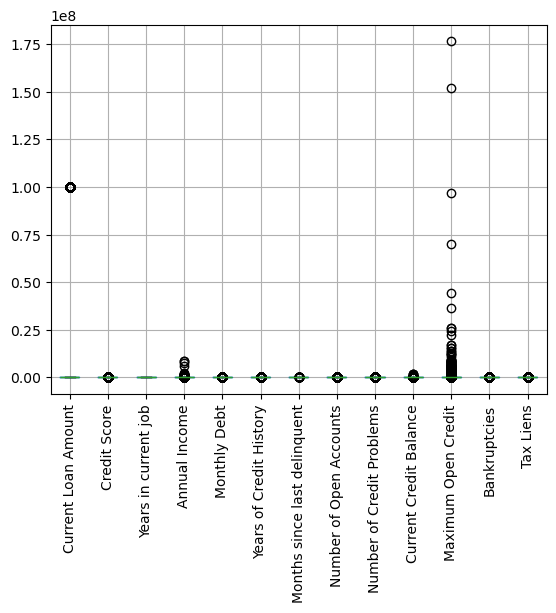

In [131]:
loan.select_dtypes(include=np.number).boxplot(rot=90)

#### Visualization

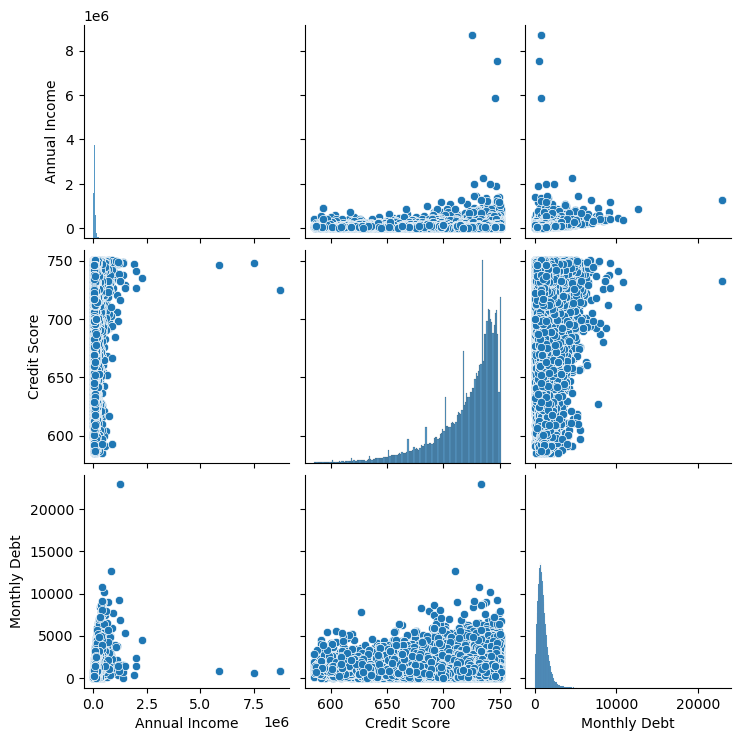

In [132]:
sns.pairplot(loan[['Annual Income', 'Credit Score', 'Monthly Debt']])

plt.show()

C:\Users\prakhar\AppData\Local\Temp\ipykernel_7348\546519414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('Loan Status')[['Annual Income', 'Credit Score']].mean().plot(kind='bar', figsize=(10, 6))


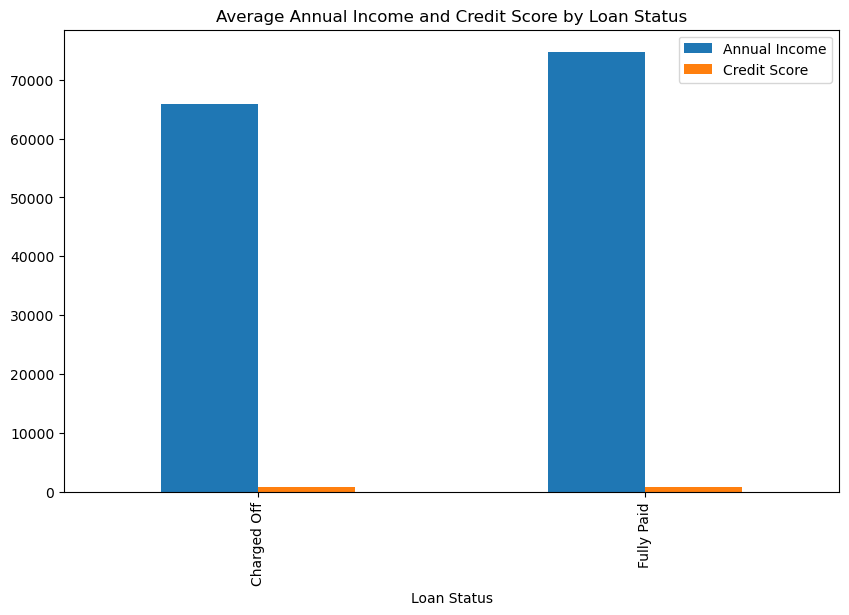

In [133]:

# Group by 'Loan Status' and calculating the mean for 'annual Income' and 'credit Score'
loan.groupby('Loan Status')[['Annual Income', 'Credit Score']].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Annual Income and Credit Score by Loan Status')
plt.show()


### Handelling Null Value or Missing Data

In [134]:
for i in loan_num:
    if loan[i].isna().sum()>0:
        print(f'Null Values present in {i} is: \n{loan[i].isna().sum()}\n % in total is {round((loan[i].isna().sum()/loan.shape[0]),2)*100}% ')
        print('========================================================')
    else:
        pass

Null Values present in Credit Score is: 
61559
 % in total is 24.0% 
Null Values present in Years in current job is: 
11476
 % in total is 4.0% 
Null Values present in Annual Income is: 
61559
 % in total is 24.0% 
Null Values present in Months since last delinquent is: 
140377
 % in total is 55.00000000000001% 


In [135]:
loan_num

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Treating Null Values

#### KNN Imputation 

This method is used to fill the missing values by identifying the similar data points based on the distance, This method preserves the data's structure and relationships, making it particularly effective for datasets with complex patterns.

- **Processing time is around 1 hr so the dataset with imputed data is preserved in a new csv file named `Loan_Cleaned_Data.csv `.
- Further analysis will be done using that file.

### Reading the Cleaned Dataset

In [136]:
loan_clean = pd.read_csv('Imputed_Data_10.csv')

In [137]:
loan_clean.head()

,Unnamed: 0,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0
1,1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,1106.04,26.3,24.0,17.0,0.0,6262,19149,0,0
2,2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,35.6,5.0,0.0,20967,28335,0,0
3,3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,40.0,9.0,0.0,22529,43915,0,0
4,4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,42.4,12.0,0.0,17391,37081,0,0


In [138]:
loan_clean=loan_clean.drop('Unnamed: 0',axis=1)

In [139]:
loan_clean.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [140]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256451 entries, 0 to 256450
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256451 non-null  object 
 1   Customer ID                   256451 non-null  object 
 2   Loan Status                   256451 non-null  object 
 3   Current Loan Amount           256451 non-null  int64  
 4   Term                          256451 non-null  object 
 5   Credit Score                  256451 non-null  float64
 6   Years in current job          256451 non-null  float64
 7   Home Ownership                256451 non-null  object 
 8   Annual Income                 256451 non-null  float64
 9   Purpose                       256451 non-null  object 
 10  Monthly Debt                  256451 non-null  float64
 11  Years of Credit History       256451 non-null  float64
 12  Months since last delinquent  256451 non-nul

In [141]:
loan_clean.duplicated().sum()

25448

In [142]:
loan_num = loan_clean.select_dtypes(include=np.number).columns
len(loan_num)

13

In [143]:
loan_num

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [144]:
loan_obj = loan_clean.select_dtypes(include='object').columns
len(loan_obj)

6

In [145]:
loan_obj

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Home Ownership',
       'Purpose'],
      dtype='object')

### Treating Categorical Column

In [146]:
loan_obj

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Home Ownership',
       'Purpose'],
      dtype='object')

#### Loan Status

In [147]:
loan_clean['Loan Status'].unique()  #we can use label encoding for Loan status and mark as 0 for charged off and 1 for fully paid

array(['Fully Paid', 'Charged Off'], dtype=object)

In [148]:
loan_clean['Loan Status'].value_counts()

Loan Status
Fully Paid     175812
Charged Off     80639
Name: count, dtype: int64

In [154]:
loan_clean['Loan Status'] = loan_clean['Loan Status'].map({'Charged Off':1 , 'Fully Paid':0})

In [155]:
loan_clean.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,NaN,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,NaN,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,1106.04,26.3,24.0,17.0,0.0,6262,19149,0,0


In [148]:
loan_clean['Loan Status'].unique()   #fully-paid=1  charged off=0

array([1, 0])

#### Term

In [149]:
loan_clean['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [150]:
loan_clean['Term'].value_counts()

Term
Short Term    192101
Long Term      64350
Name: count, dtype: int64

In [151]:
loan_clean['Term'] = label_encoder.fit_transform(loan_clean['Term'])

In [152]:
loan_clean['Term'].unique()

array([1, 0])

In [153]:
loan_clean.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0


#### 'Home Ownership'

In [154]:
loan_clean['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [155]:
df_encoded_HO= pd.get_dummies(loan_clean['Home Ownership'], columns=['Home Ownership']).astype(int)
df_encoded_HO

,Home Mortgage,Own Home,Rent
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
256446,0,0,1
256447,0,1,0
256448,1,0,0
256449,1,0,0


In [156]:
loan_clean = pd.concat([loan_clean, df_encoded_HO], axis=1)
loan_clean=loan_clean.drop('Home Ownership',axis=1)

In [157]:
loan_clean.head(1)
#As we can drop one of the column that we fetch after onehot encoding as
# 1-0 =Home Mortgage
# 0-1 = Own Home
# 0-0 = Rent
#Droping Rent Column

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Rent
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,33694.0,Debt Consolidation,584.03,...,41.0,10.0,0.0,6760,16056,0,0,1,0,0


In [158]:
loan_clean=loan_clean.drop('Rent',axis=1)

In [159]:
loan_clean.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,33694.0,Debt Consolidation,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0,1,0


#### Purpose

In [160]:
loan_clean['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [161]:
loan_clean['Purpose'].value_counts()

Purpose
Debt Consolidation      203605
Home Improvements        14876
other                    14196
Other                     9629
Business Loan             4672
Buy a Car                 3262
Medical Bills             2862
Take a Trip               1565
Buy House                 1527
Educational Expenses       257
Name: count, dtype: int64

In [162]:
df_encoded_purpose= pd.get_dummies(loan_clean['Purpose'], columns=['Purpose']).astype(int)
df_encoded_purpose

,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,other
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
256446,0,0,0,1,0,0,0,0,0,0
256447,0,0,0,1,0,0,0,0,0,0
256448,0,0,0,1,0,0,0,0,0,0
256449,0,0,0,1,0,0,0,0,0,0


- This type of encoding leads to create a lot of feature instead of this method we can do frequency coding and take its frequency as data

In [163]:
frequency_encoding= loan_clean['Purpose'].value_counts(normalize=False)
loan_clean['Purpose_freq'] = loan_clean['Purpose'].map(frequency_encoding)

In [164]:
loan_clean = loan_clean.drop('Purpose',axis=1)


In [165]:
loan_clean.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose_freq
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,33694.0,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0,1,0,203605


In [166]:
loan_clean=loan_clean.rename(columns={'Purpose_freq':'Purpose'})

In [167]:
loan_clean.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10.0,33694.0,584.03,12.3,41.0,10.0,0.0,6760,16056,0,0,1,0,203605


### Overview of Cleaned and encoded data

In [168]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256451 entries, 0 to 256450
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256451 non-null  object 
 1   Customer ID                   256451 non-null  object 
 2   Loan Status                   256451 non-null  int32  
 3   Current Loan Amount           256451 non-null  int64  
 4   Term                          256451 non-null  int32  
 5   Credit Score                  256451 non-null  float64
 6   Years in current job          256451 non-null  float64
 7   Annual Income                 256451 non-null  float64
 8   Monthly Debt                  256451 non-null  float64
 9   Years of Credit History       256451 non-null  float64
 10  Months since last delinquent  256451 non-null  float64
 11  Number of Open Accounts       256451 non-null  float64
 12  Number of Credit Problems     256451 non-nul

- customerid and loanid can be remove out from the analysis as  they are unique identifier so will not play a crucial role in the process.

In [169]:
loan_clean=loan_clean.drop(['Loan ID','Customer ID'],axis=1)

- As all columns are now encoded and converted into the machine readable form so now there will be no other dtypes other than fliat or int

In [170]:
loan_obj = loan_clean.select_dtypes(include='object').columns
len(loan_obj)


0

In [171]:
loan_num = loan_clean.select_dtypes(include=np.number).columns
len(loan_num)

18

In [172]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256451 entries, 0 to 256450
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256451 non-null  int32  
 1   Current Loan Amount           256451 non-null  int64  
 2   Term                          256451 non-null  int32  
 3   Credit Score                  256451 non-null  float64
 4   Years in current job          256451 non-null  float64
 5   Annual Income                 256451 non-null  float64
 6   Monthly Debt                  256451 non-null  float64
 7   Years of Credit History       256451 non-null  float64
 8   Months since last delinquent  256451 non-null  float64
 9   Number of Open Accounts       256451 non-null  float64
 10  Number of Credit Problems     256451 non-null  float64
 11  Current Credit Balance        256451 non-null  int64  
 12  Maximum Open Credit           256451 non-nul

### Treating Duplicated Values

In [173]:
loan_clean.duplicated().sum()

25448

In [174]:
loan_clean.duplicated().sum()/loan_clean.shape[0]*100 

9.923143212543527

- As the amount of duplicated values is not significant and will not play that much crucial role in the analysis we can drop these

In [175]:
loan_clean=loan_clean.drop_duplicates()

In [176]:
loan_clean.duplicated().sum()

0

In [177]:
loan_clean.shape

(231003, 18)

### Identifying Outliers

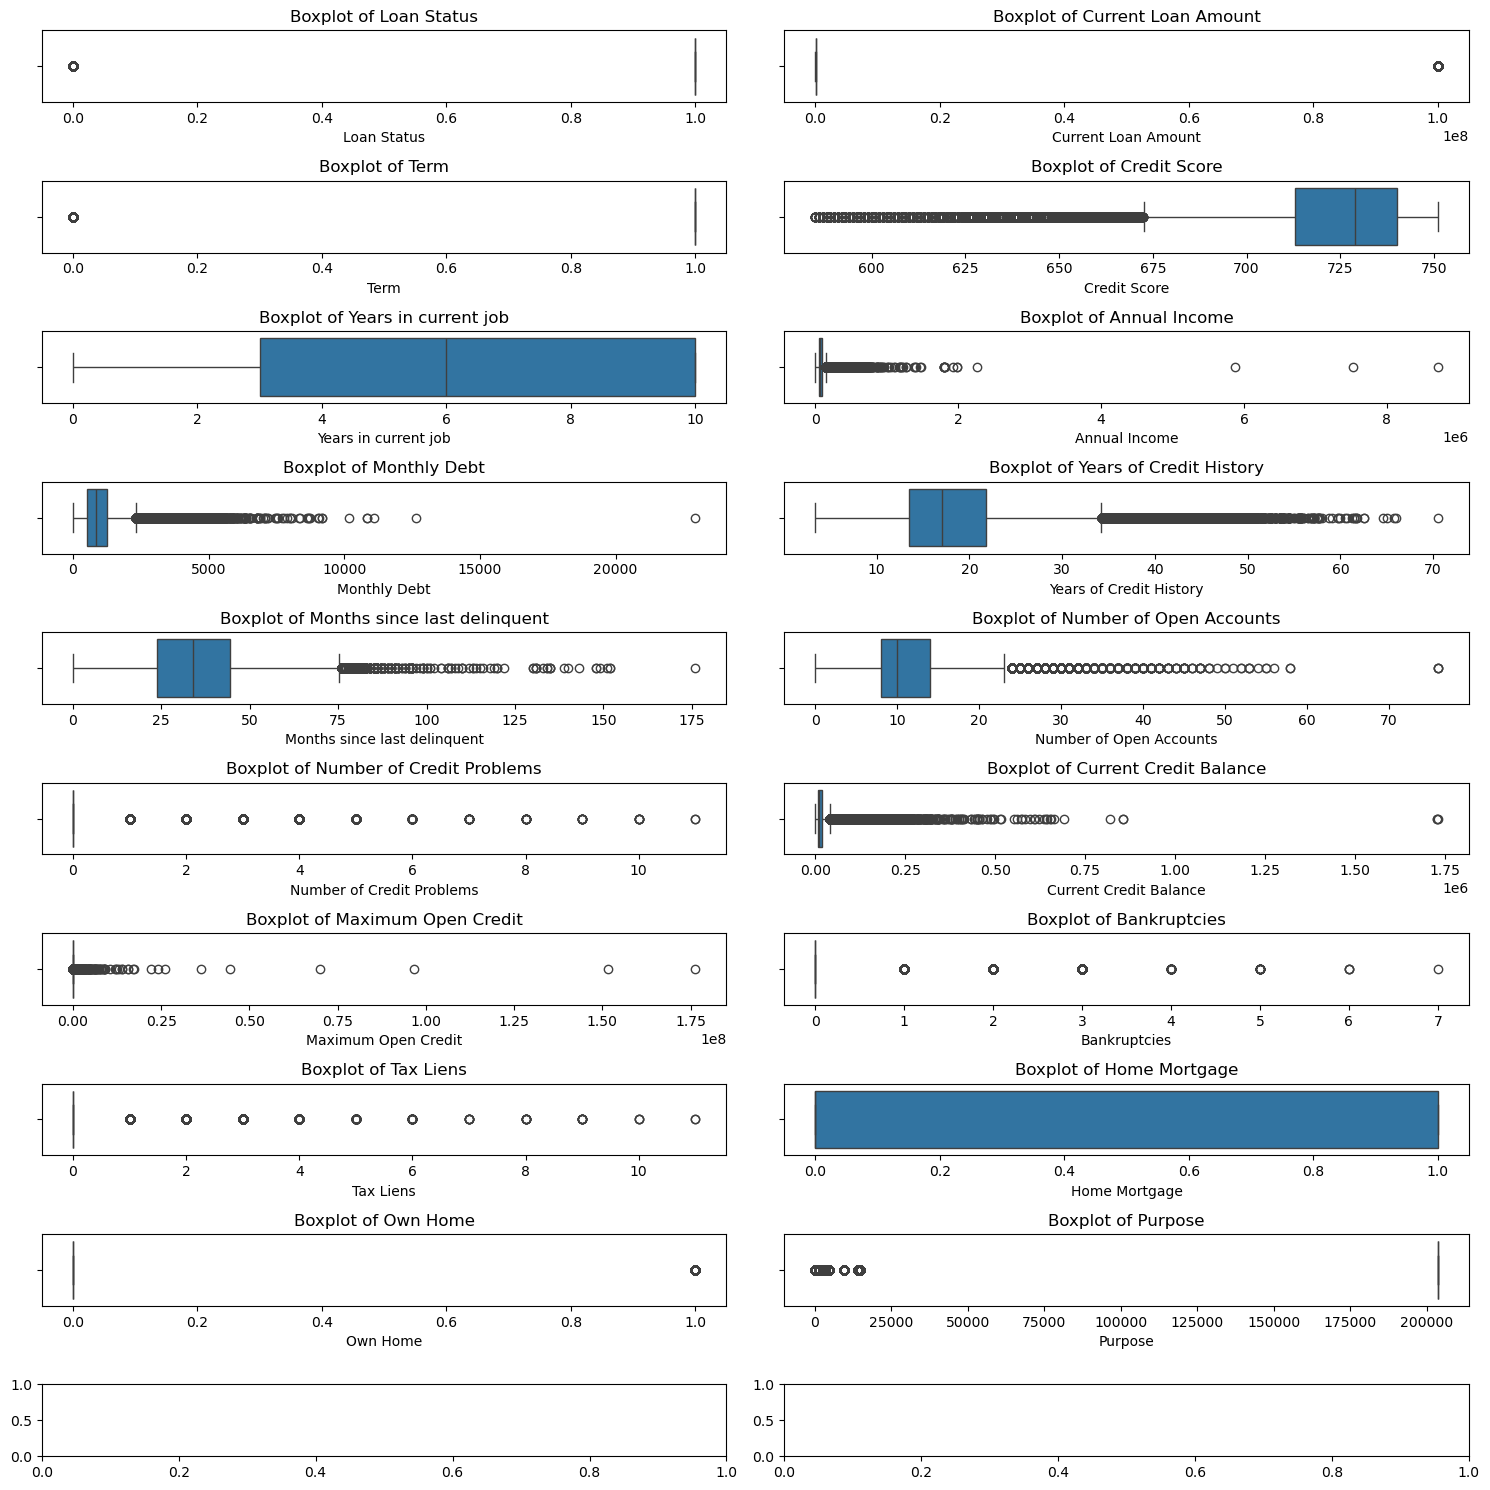

In [178]:
fig, axes = plt.subplots(10, 2, figsize=(15, 15))
axes = axes.flatten()  

for i, col in enumerate(loan_num):
    sns.boxplot(data=loan_clean, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- Features with Outliers:
**Monthly Debt**,**Annual Income**,**Months since Last Delinquent**,**Number of Credit Problems**,**Current Credit Balance**,**Number of Open Accounts**,**Years of Credit History**,**Maximum Open Credit**,**Bankruptcies**,**Tax Liens**

- **Features with Few or No Outliers:**
- **Loan Status**, **Term**, **Home Mortgage**, **Own Home**, **Rent**, **Purpose_freq**

- **Out of all outliers columns the main columns to focus on is 'Annual Income','Monthly Debt','Credit Score','Current Credit Balance'**
- **For approving loan to a person these features play role a bit high as compared to others so these needs to be treated carefully.**

### Checking the Data is normally distributed or not

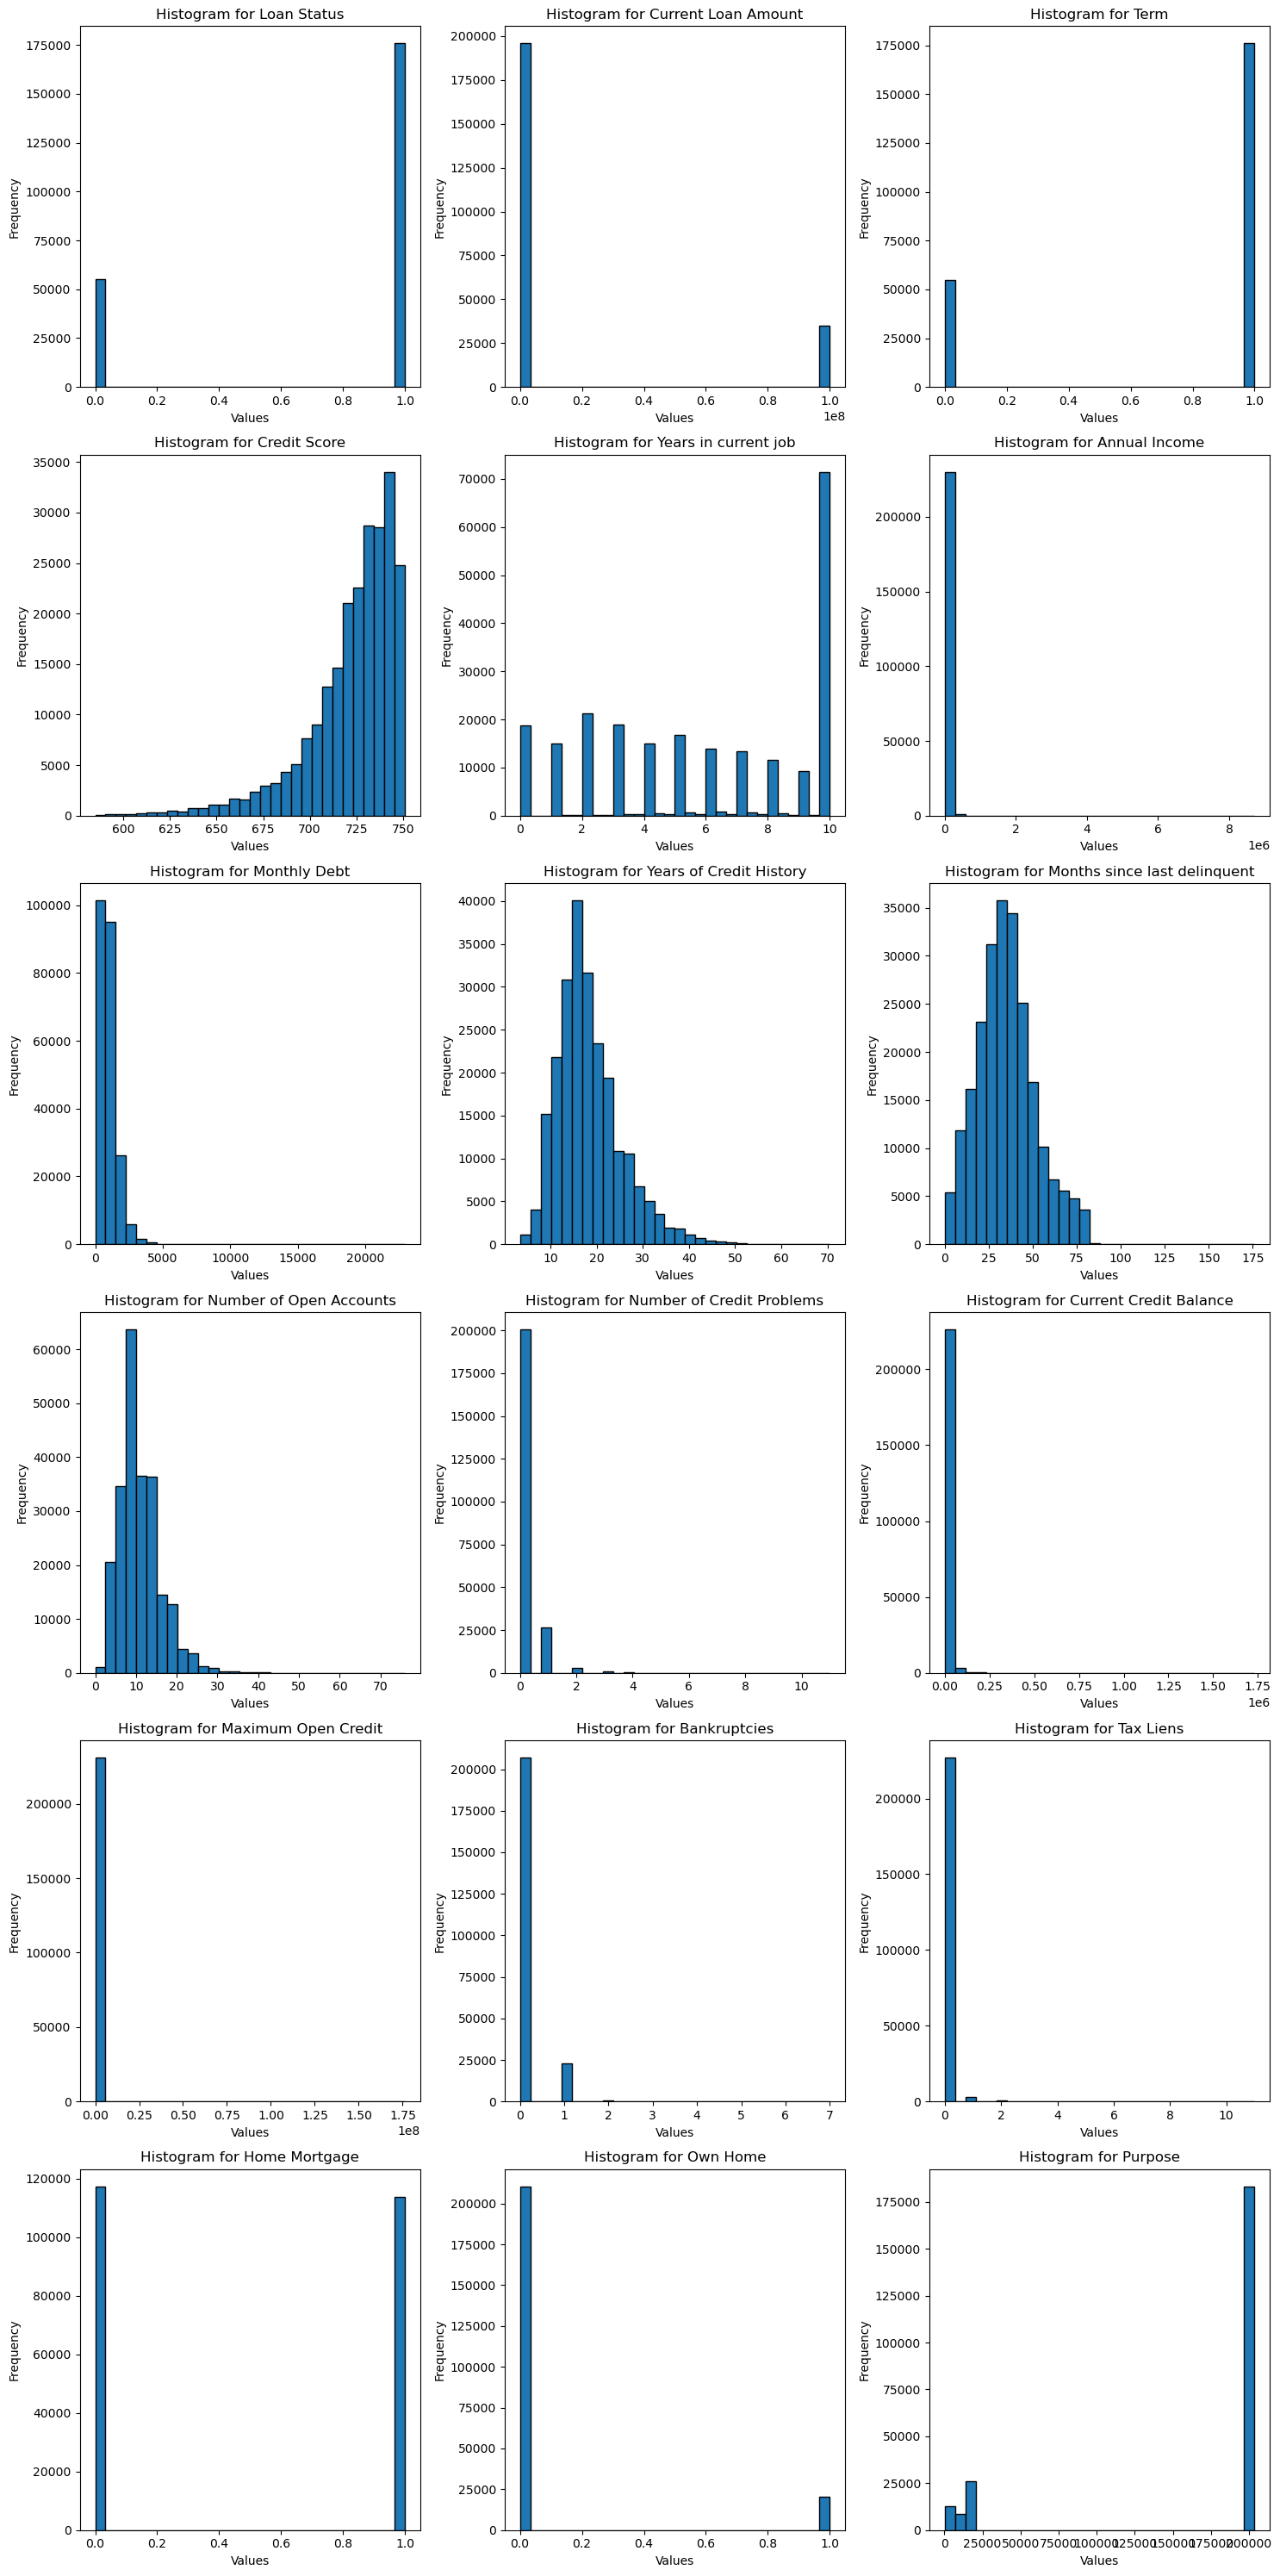

In [179]:
num_columns = len(loan_num)  
n_rows = (num_columns + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten axes if necessary
axes = axes.flatten()

for i, column in enumerate(loan_clean.columns):
    axes[i].hist(loan_clean[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

- Data is not Normally distributed so we will use IQR Method for removing Outliers.

IQR Method

Columns to consider:

- Annual Income

<Axes: ylabel='Annual Income'>

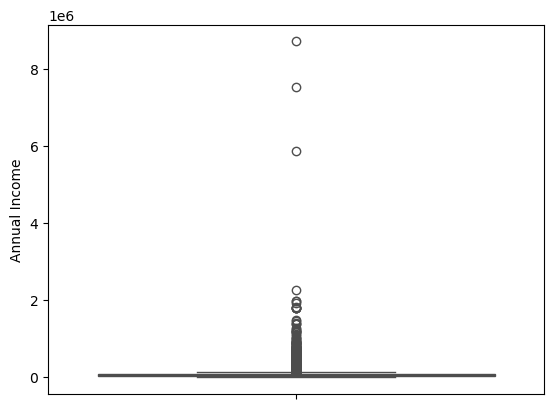

In [180]:
sns.boxplot(loan_clean,y='Annual Income',color='blue')

In [181]:
Q1 = loan_clean['Annual Income'].quantile(0.25)
Q3 = loan_clean['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = loan_clean[(loan_clean['Annual Income'] < lower_bound) | (loan_clean['Annual Income'] > upper_bound)]
num_outliers_AI = outliers.shape[0]

print(f"Number of outliers: {num_outliers_AI}")
print(f"% of outliers: {num_outliers_AI*100/loan_clean.shape[0]}")

Number of outliers: 10579
% of outliers: 4.5795942044042715


- Credit Score

<Axes: ylabel='Credit Score'>

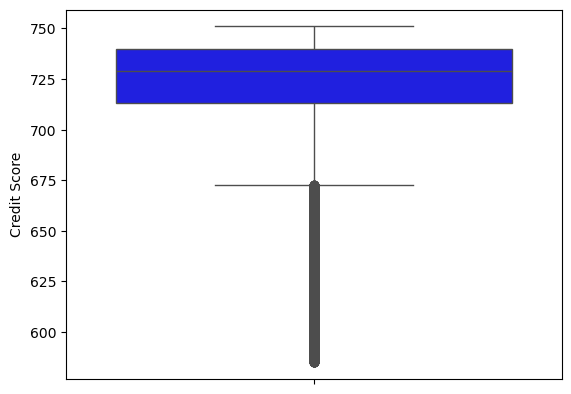

In [182]:
sns.boxplot(loan_clean,y='Credit Score',color='blue')

In [183]:
Q1 = loan_clean['Credit Score'].quantile(0.25)
Q3 = loan_clean['Credit Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = loan_clean[(loan_clean['Credit Score'] < lower_bound) | (df['Credit Score'] > upper_bound)]
num_outliers_CS = outliers.shape[0]

print(f"Number of outliers: {num_outliers_CS}")
print(f"% of outliers: {num_outliers_CS*100/loan_clean.shape[0]}")

Number of outliers: 25104
% of outliers: 10.867391332580096


C:\Users\prakhar\AppData\Local\Temp\ipykernel_11848\1086913582.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = loan_clean[(loan_clean['Credit Score'] < lower_bound) | (df['Credit Score'] > upper_bound)]


In [184]:
loan_clean.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Home Mortgage', 'Own Home', 'Purpose'],
      dtype='object')

- Monthly Debt

In [185]:
Q1 = loan_clean['Monthly Debt'].quantile(0.25)
Q3 = loan_clean['Monthly Debt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = loan_clean[(loan_clean['Monthly Debt'] < lower_bound) | (loan_clean['Monthly Debt'] > upper_bound)]
num_outliers_MB = outliers.shape[0]

print(f"Number of outliers: {num_outliers_MB}")
print(f"% of outliers: {num_outliers_MB*100/loan_clean.shape[0]}")

Number of outliers: 7721
% of outliers: 3.3423808348809323


Credit Balance

In [186]:
Q1 = loan_clean['Current Credit Balance'].quantile(0.25)
Q3 = loan_clean['Current Credit Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = loan_clean[(loan_clean['Current Credit Balance'] < lower_bound) | (loan_clean['Current Credit Balance'] > upper_bound)]
num_outliers_CB = outliers.shape[0]

print(f"Number of outliers: {num_outliers_CB}")
print(f"% of outliers: {num_outliers_CB*100/loan_clean.shape[0]}")

Number of outliers: 11911
% of outliers: 5.156210092509621


In [187]:
print(f"For Annual Income -> Number of outliers: {num_outliers_AI} and % in total is: {num_outliers_AI*100/loan_clean.shape[0]}% ")
print(f"For Monthly Debt  -> Number of outliers: {num_outliers_MB} and % in total is: {num_outliers_MB*100/loan_clean.shape[0]}% ")
print(f"For Credit Score  -> Number of outliers: {num_outliers_CS} and % in total is: {num_outliers_CS*100/loan_clean.shape[0]}% ")
print(f"For Credit Balance-> Number of outliers: {num_outliers_CB} and % in total is: {num_outliers_CB*100/loan_clean.shape[0]}% ")

For Annual Income -> Number of outliers: 10579 and % in total is: 4.5795942044042715% 
For Monthly Debt  -> Number of outliers: 7721 and % in total is: 3.3423808348809323% 
For Credit Score  -> Number of outliers: 25104 and % in total is: 10.867391332580096% 
For Credit Balance-> Number of outliers: 11911 and % in total is: 5.156210092509621% 


### Outlier Treatment

- Replacing the Outlier values with p5 or p95% value based on the position of outlier

In [188]:
loan_clean.shape

(231003, 18)

In [189]:
#Function to Replace Outliers with p95 andp5 values based on its position.
def replace_outliers(df, column_name):
    
    for i in column_name:
        lower_bound = df[i].quantile(0.05)
        upper_bound = df[i].quantile(0.95)
        df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else x)
        df[i] = df[i].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df



In [190]:
out_cols = ['Annual Income','Monthly Debt','Credit Score','Current Credit Balance']

In [191]:
loan_clean = replace_outliers(loan_clean,out_cols)

### Descriptive Statistics (Finally)

#### Description

In [192]:
loan_clean.describe()  
#out_cols = ['Annual Income','Monthly Debt','Credit Score','Current Credit Balance']
# The major influencing outliers now looking fine for further analysis

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
count,231003.000000,2.310030e+05,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000,2.310030e+05,231003.000000,231003.000000,231003.000000,231003.000000,231003.000000
mean,0.761081,1.522326e+07,0.761977,723.570114,5.889180,68585.464439,934.746656,18.323326,34.957025,11.093414,0.156093,13996.418565,3.640735e+04,0.110367,0.026801,0.492275,0.088852,163761.250109
std,0.426424,3.590831e+07,0.425874,20.579849,3.569079,29133.729788,524.590784,7.068247,16.615092,4.974482,0.459734,10490.372943,5.819692e+05,0.336605,0.244072,0.499941,0.284530,78142.987969
min,0.000000,7.010000e+02,0.000000,673.000000,0.000000,29514.000000,194.340000,3.400000,0.000000,0.000000,0.000000,1583.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,257.000000
25%,1.000000,8.329000e+03,1.000000,713.000000,3.000000,46309.200000,530.255000,13.500000,23.800000,8.000000,0.000000,5956.000000,1.288100e+04,0.000000,0.000000,0.000000,0.000000,203605.000000
50%,1.000000,1.453200e+04,1.000000,729.000000,6.000000,62511.400000,842.970000,17.000000,34.000000,10.000000,0.000000,11056.000000,2.191800e+04,0.000000,0.000000,0.000000,0.000000,203605.000000
75%,1.000000,2.475800e+04,1.000000,740.000000,10.000000,84507.000000,1251.190000,21.800000,44.400000,14.000000,0.000000,19315.500000,3.651900e+04,0.000000,0.000000,1.000000,0.000000,203605.000000
max,1.000000,1.000000e+08,1.000000,748.000000,10.000000,138165.900000,2111.380000,70.500000,176.000000,76.000000,11.000000,39804.700000,1.763322e+08,7.000000,11.000000,1.000000,1.000000,203605.000000


**Inference**:
1. About 76% of loans are fully paid, with a significant average loan amount of approximately 15.2 million. 
2. Credit scores average around 724, with a range of 673 to 748, 
3. The average annual income is about 68,585. 
4. No Outliers, duplicated values and null values present in the data


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


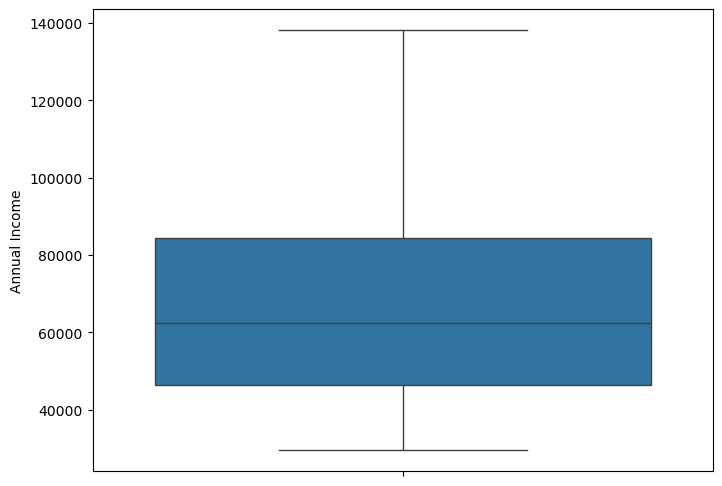

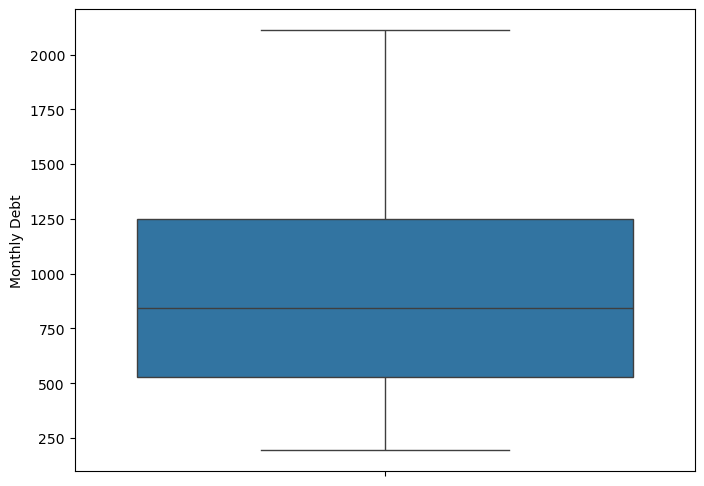

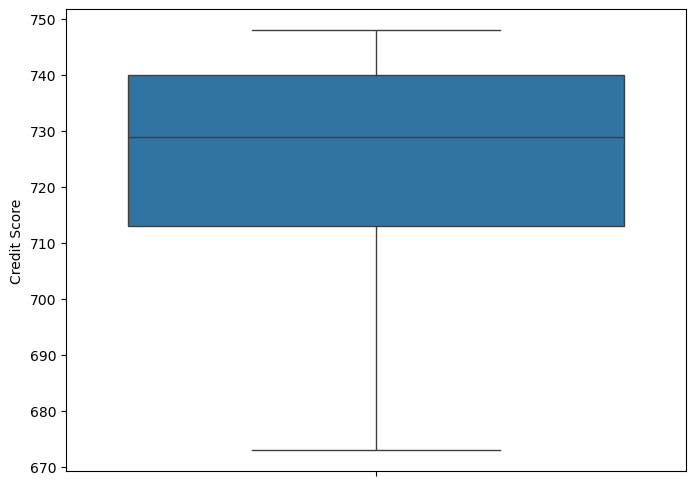

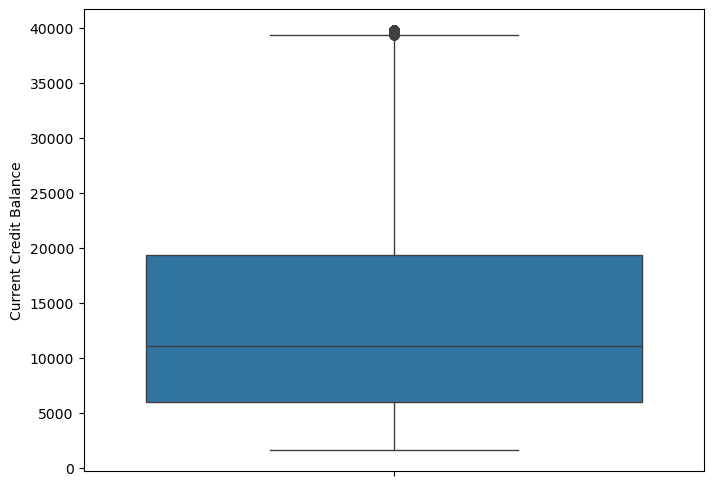

In [193]:
out_cols = ['Annual Income','Monthly Debt','Credit Score','Current Credit Balance']
for i in out_cols:
    plt.figure(figsize=(8, 6))
    print(sns.boxplot(loan_clean,y=i))

In [194]:
loan_clean

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
0,1,11520,1,741.0,10.0,33694.0,584.03,12.3,41.0,10.0,0.0,6760.0,16056,0,0,1,0,203605
1,1,3441,1,734.0,4.0,42269.0,1106.04,26.3,24.0,17.0,0.0,6262.0,19149,0,0,1,0,14196
2,1,21029,1,747.0,10.0,90126.0,1321.85,28.8,35.6,5.0,0.0,20967.0,28335,0,0,1,0,203605
3,1,18743,1,747.0,10.0,38072.0,751.92,26.2,40.0,9.0,0.0,22529.0,43915,0,0,0,1,203605
4,1,11731,1,746.0,4.0,50025.0,355.18,11.5,42.4,12.0,0.0,17391.0,37081,0,0,0,0,203605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256444,0,11953,1,717.0,10.0,39844.0,982.82,11.7,52.2,9.0,1.0,4176.0,4783,1,0,1,0,203605
256446,1,3911,1,718.0,2.0,90041.0,1706.58,19.9,47.8,16.0,0.0,39804.7,44080,0,0,0,0,203605
256447,1,5078,1,737.0,10.0,77186.0,1376.47,19.1,47.0,9.0,0.0,1717.0,9758,0,0,0,1,203605
256448,0,12116,1,746.0,9.0,52504.0,297.96,15.1,82.0,8.0,0.0,3315.0,20090,0,0,1,0,203605


#### Correlation

In [195]:
corr=loan_clean.corr()

In [196]:
corr

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
Loan Status,1.000000,0.237303,0.172304,0.215927,0.004638,0.079552,-0.017102,0.033285,0.011343,-0.019496,-0.009143,-0.001719,0.006925,0.001123,-0.012014,0.061814,-0.007820,-0.000340
Current Loan Amount,0.237303,1.000000,0.039599,0.070174,0.005439,0.033891,-0.001447,0.013226,0.000994,-0.002151,0.000720,0.001500,0.006079,0.003735,-0.002504,0.019469,-0.005773,0.000039
Term,0.172304,0.039599,1.000000,0.397549,-0.063821,-0.101754,-0.163270,-0.035126,0.011753,-0.077302,0.020201,-0.142357,-0.005704,0.021422,0.004398,-0.099277,0.009268,-0.032289
Credit Score,0.215927,0.070174,0.397549,1.000000,-0.014309,0.038169,-0.072543,0.110206,0.023279,-0.040309,-0.074424,-0.011186,0.010719,-0.059855,-0.031288,0.056677,-0.011751,0.050984
Years in current job,0.004638,0.005439,-0.063821,-0.014309,1.000000,0.131134,0.133753,0.222887,-0.000876,0.047784,0.043394,0.132306,0.003902,0.046402,0.008058,0.196205,0.013431,0.035109
Annual Income,0.079552,0.033891,-0.101754,0.038169,0.131134,1.000000,0.534028,0.235135,-0.055580,0.252777,-0.031860,0.389811,0.033789,-0.065437,0.036394,0.242087,-0.050555,-0.008727
Monthly Debt,-0.017102,-0.001447,-0.163270,-0.072543,0.133753,0.534028,1.000000,0.189469,-0.050294,0.427530,-0.056920,0.544381,0.022173,-0.080256,0.017374,0.216322,-0.039182,0.111294
Years of Credit History,0.033285,0.013226,-0.035126,0.110206,0.222887,0.235135,0.189469,1.000000,-0.028086,0.128284,0.060981,0.260225,0.021449,0.061729,0.020696,0.180068,0.031491,0.010057
Months since last delinquent,0.011343,0.000994,0.011753,0.023279,-0.000876,-0.055580,-0.050294,-0.028086,1.000000,-0.049946,0.106300,-0.031295,-0.001420,0.119647,0.014304,-0.030340,-0.000871,0.005638
Number of Open Accounts,-0.019496,-0.002151,-0.077302,-0.040309,0.047784,0.252777,0.427530,0.128284,-0.049946,1.000000,-0.014866,0.324836,0.018433,-0.023750,0.005525,0.135470,-0.008173,0.108892


<Axes: >

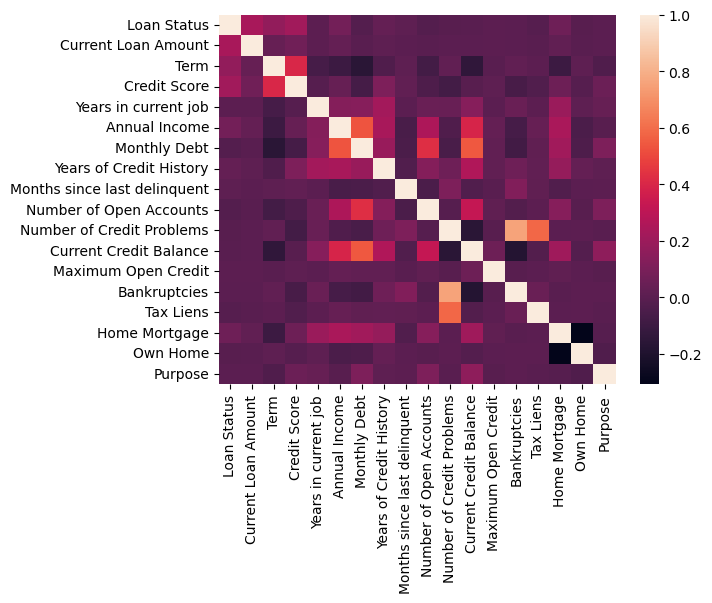

In [197]:
sns.heatmap(corr)

**Inference**:
The correlation matrix reveals several important relationships: 
1. "Loan Status" shows a moderate positive correlation with "Current Loan Amount" (0.24) and "Credit Score" (0.22), indicating that higher loan amounts and better credit scores are associated with successful loan repayment. 
2. "Monthly Debt" and "Annual Income" exhibit a strong positive correlation (0.53), suggesting that as income increases, monthly debt also tends to rise.
3. the "Number of Credit Problems" is significantly correlated with "Bankruptcies" (0.76), underscoring a strong link between credit issues and financial distress.

#### Visualisation

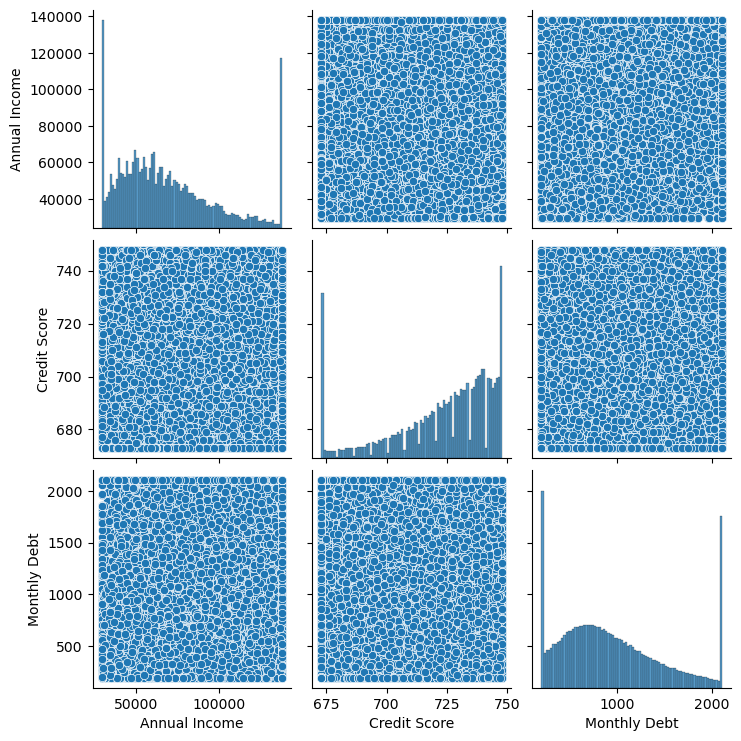

In [198]:
sns.pairplot(loan_clean[['Annual Income', 'Credit Score', 'Monthly Debt']])

plt.show()


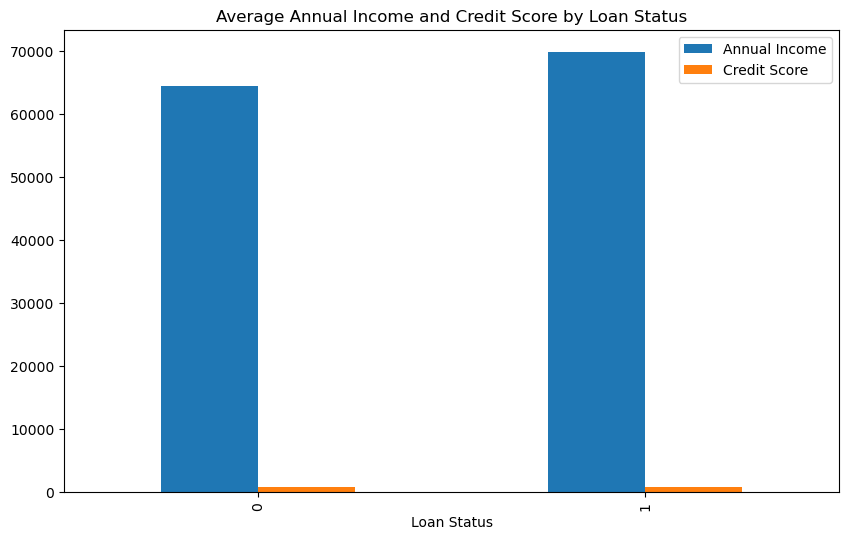

In [199]:
# Group by 'Loan Status' and calculate the mean for 'Annual Income' and 'Credit Score'
loan_clean.groupby('Loan Status')[['Annual Income', 'Credit Score']].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Annual Income and Credit Score by Loan Status')
plt.show()


### New Cleaned Dataset (Final)
- The Dataset free from null values and Outliers is stored as **cleaned_data.csv**

In [200]:
loan_clean.to_csv('Loan_Cleaned_10.csv')

## Feature Scaling

- For Feature Scaling first we need to split the feature and label columns
- Label Column - `Loan Status `

In [201]:
X = loan_clean.drop('Loan Status',axis=1)

In [202]:
X.sample(5,random_state=54)

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
165308,34825,0,673.0,7.0,91604.0,2111.38,42.5,45.6,10.0,0.0,39804.7,84825,0,0,1,0,9629
128830,16728,1,745.0,4.0,54764.0,803.20,24.0,51.4,6.0,1.0,9681.0,24325,0,0,1,0,203605
240162,99999999,0,728.0,2.0,97280.0,1548.37,10.8,78.0,12.0,0.0,16889.0,56109,0,0,0,0,203605
152258,3228,1,694.8,1.0,45444.6,325.16,7.9,14.8,5.0,0.0,3084.0,3803,0,0,0,0,203605
169875,99999999,1,745.0,4.0,52453.0,546.38,18.5,45.0,11.0,0.0,16770.0,27903,0,0,0,0,203605


In [203]:
X.shape

(231003, 17)

In [204]:
Y = pd.DataFrame(loan_clean['Loan Status'])

In [205]:
Y.sample(5,random_state=54)

,Loan Status
165308,0
128830,1
240162,1
152258,0
169875,1


In [206]:
Y.shape

(231003, 1)

#### **MinMax Scaling**
- As described earlier the given data is not normally distributed so we cannot use Z-Score/ Standard Scalar
- MinMax Scalar is a suitable option It will scale the data between 0 and 1.


In [207]:
scaler = MinMaxScaler()

In [208]:
X_scaled = scaler.fit_transform(X)

In [209]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [210]:
type(X_scaled)

pandas.core.frame.DataFrame

In [211]:
X_scaled

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
0,0.000108,1.0,0.906667,1.0,0.038471,0.203277,0.132638,0.232955,0.131579,0.000000,0.135447,0.000091,0.000000,0.0,1.0,0.0,1.000000
1,0.000027,1.0,0.813333,0.4,0.117393,0.475577,0.341282,0.136364,0.223684,0.000000,0.122417,0.000109,0.000000,0.0,1.0,0.0,0.068548
2,0.000203,1.0,0.986667,1.0,0.557855,0.588152,0.378539,0.202273,0.065789,0.000000,0.507146,0.000161,0.000000,0.0,1.0,0.0,1.000000
3,0.000180,1.0,0.986667,1.0,0.078765,0.290855,0.339791,0.227273,0.118421,0.000000,0.548013,0.000249,0.000000,0.0,0.0,1.0,1.000000
4,0.000110,1.0,0.973333,0.4,0.188777,0.083900,0.120715,0.240909,0.157895,0.000000,0.413587,0.000210,0.000000,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230998,0.000113,1.0,0.586667,1.0,0.095074,0.411301,0.123696,0.296591,0.118421,0.090909,0.067841,0.000027,0.142857,0.0,1.0,0.0,1.000000
230999,0.000032,1.0,0.600000,0.2,0.557073,0.788841,0.245902,0.271591,0.210526,0.000000,1.000000,0.000250,0.000000,0.0,0.0,0.0,1.000000
231000,0.000044,1.0,0.853333,1.0,0.438759,0.616643,0.233979,0.267045,0.118421,0.000000,0.003506,0.000055,0.000000,0.0,0.0,1.0,1.000000
231001,0.000114,1.0,0.973333,0.9,0.211593,0.054052,0.174367,0.465909,0.105263,0.000000,0.045315,0.000114,0.000000,0.0,1.0,0.0,1.000000


- Data is scaled between 0 and 1

In [ ]:
loan_clean.to_csv('cleaned_data.csv')

## Train-Test Split

In [212]:
X_scaled

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
0,0.000108,1.0,0.906667,1.0,0.038471,0.203277,0.132638,0.232955,0.131579,0.000000,0.135447,0.000091,0.000000,0.0,1.0,0.0,1.000000
1,0.000027,1.0,0.813333,0.4,0.117393,0.475577,0.341282,0.136364,0.223684,0.000000,0.122417,0.000109,0.000000,0.0,1.0,0.0,0.068548
2,0.000203,1.0,0.986667,1.0,0.557855,0.588152,0.378539,0.202273,0.065789,0.000000,0.507146,0.000161,0.000000,0.0,1.0,0.0,1.000000
3,0.000180,1.0,0.986667,1.0,0.078765,0.290855,0.339791,0.227273,0.118421,0.000000,0.548013,0.000249,0.000000,0.0,0.0,1.0,1.000000
4,0.000110,1.0,0.973333,0.4,0.188777,0.083900,0.120715,0.240909,0.157895,0.000000,0.413587,0.000210,0.000000,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230998,0.000113,1.0,0.586667,1.0,0.095074,0.411301,0.123696,0.296591,0.118421,0.090909,0.067841,0.000027,0.142857,0.0,1.0,0.0,1.000000
230999,0.000032,1.0,0.600000,0.2,0.557073,0.788841,0.245902,0.271591,0.210526,0.000000,1.000000,0.000250,0.000000,0.0,0.0,0.0,1.000000
231000,0.000044,1.0,0.853333,1.0,0.438759,0.616643,0.233979,0.267045,0.118421,0.000000,0.003506,0.000055,0.000000,0.0,0.0,1.0,1.000000
231001,0.000114,1.0,0.973333,0.9,0.211593,0.054052,0.174367,0.465909,0.105263,0.000000,0.045315,0.000114,0.000000,0.0,1.0,0.0,1.000000


In [ ]:
Y

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state=100)

In [ ]:
X_train.head(2)

In [ ]:
X_train.shape

In [ ]:
X_test.head(2)

In [ ]:
X_test.shape

In [ ]:
Y_train.head(2)

In [ ]:
Y_train.shape

In [ ]:
Y_test.head(2)

In [ ]:
Y_test.shape

### Storing the Train and Test 

**Last Column in train and test data csv files are y_train and y_test**

In [ ]:
Training_Data = pd.concat([X_train,Y_train],axis=1)
Test_Data = pd.concat([X_test,Y_test],axis=1)

#One unknown 0 column is creating as 1st column so need to remove while using the data

In [ ]:
Training_Data.to_csv('train_data_10.csv')
Test_Data.to_csv('test_data_10.csv')